In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = {}
models['Linear Regression'] = LinearRegression()
models['Neural Network'] = MLPRegressor()
models['Decision Tree'] = DecisionTreeRegressor()
models['Random Forest'] = RandomForestRegressor()
models['Support Vector Machine'] = SVR()
models['Gaussian Process'] = GaussianProcessRegressor()

R2, MAE = {}, {}

data = pd.read_csv("DelayedFlights.csv")[:25000]
delay_cols = ["Month", "DayofMonth", "DayOfWeek", "DepTime", "Distance"]

X = data[delay_cols]
y = data.DepDelay

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

for key in models.keys():
    models[key].fit(X_train, y_train)
    predictions = models[key].predict(X_valid)
    R2[key] = r2_score(y_valid, predictions)
    MAE[key] = mean_absolute_error(y_valid, predictions)

df_model = pd.DataFrame(index=models.keys(), columns=['R2', 'MAE'])
df_model['R2'] = R2.values()
df_model['MAE'] = MAE.values()



<AxesSubplot:ylabel='R2'>

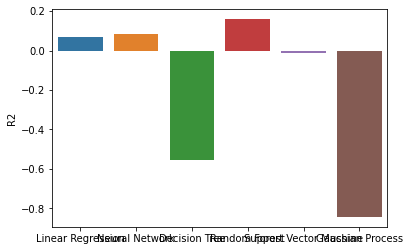

In [2]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_model.index, y=df_model['R2'])

<AxesSubplot:ylabel='MAE'>

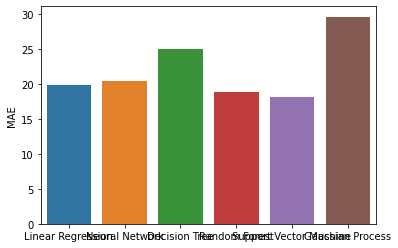

In [3]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_model.index, y=df_model['MAE'])